# .5 比较数据


## .5.1 凑一个b的值
0. 需要把W和x都除以250。
0. 然后得到的值是20.1和56.7
0. 而书上是20.1和54.2
0. 这样两个差不多了。

784 (784, 1)
10
784 (784, 1)
10
784 (784, 1)
10
784 (784, 1)
10
784 (784, 1)
10
['/home/jm/mnist', '/home/jm/.pyenv/versions/3.9.10/lib/python39.zip', '/home/jm/.pyenv/versions/3.9.10/lib/python3.9', '/home/jm/.pyenv/versions/3.9.10/lib/python3.9/lib-dynload', '', '/home/jm/.pyenv/versions/3.9.10/envs/mnist1/lib/python3.9/site-packages']
['/home/jm/mnist', '/home/jm/.pyenv/versions/3.9.10/lib/python39.zip', '/home/jm/.pyenv/versions/3.9.10/lib/python3.9', '/home/jm/.pyenv/versions/3.9.10/lib/python3.9/lib-dynload', '', '/home/jm/.pyenv/versions/3.9.10/envs/mnist1/lib/python3.9/site-packages']
1.0
['/home/jm/mnist', '/home/jm/.pyenv/versions/3.9.10/lib/python39.zip', '/home/jm/.pyenv/versions/3.9.10/lib/python3.9', '/home/jm/.pyenv/versions/3.9.10/lib/python3.9/lib-dynload', '', '/home/jm/.pyenv/versions/3.9.10/envs/mnist1/lib/python3.9/site-packages']


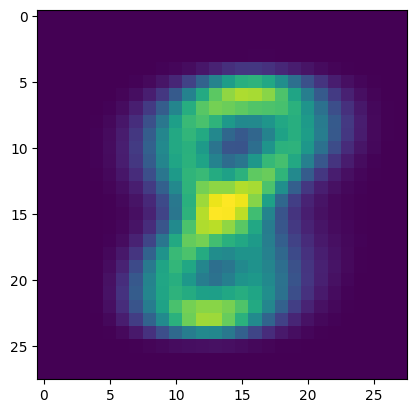

[[3.43899525e-11]]
[[0.99999199]]
第三个样例的输入的形状是：(784, 1)
第三个样例的输入的最大值是：255
第三个样例的输出的形状是：(10, 1)
第三个样例的输出的最大概率所对应的类别索引是：4
第三个样例的输入中的最大灰度值是：255
第18个样例的输入的形状是：(784, 1)
第18个样例的输入的最大值是：255
第18个样例的输出的形状是：(10, 1)
第18个样例的输出的最大概率所对应的类别索引是：8
avg_eight样例的输出的形状是：(784, 1)
avg_eight样例的输入中的最大灰度值是：212.69304392411553
avg_eight数组,转置后的W形状是：(1, 784)
avg_eight数组,转置后的W的最大灰度值是：212.69304392411553
W和avg_eight相乘：[[3577902.13990153]]
W和a3相乘：[[20.90674333]]
W和a18相乘：[[56.73526457]]


In [1]:
import numpy as np
from dlgo.nn.load_mnist import load_data
train, test = load_data()

from dlgo.nn.average_digits import average_digit
avg_eight = average_digit(train, 8) 

x_3 = train[2][0]
y_3 = train[2][1]

print(f"第三个样例的输入的形状是：{x_3.shape}")
print(f"第三个样例的输入的最大值是：{np.max(x_3)}")
print(f"第三个样例的输出的形状是：{y_3.shape}")
print(f"第三个样例的输出的最大概率所对应的类别索引是：{np.argmax(y_3)}")

# 不需要循环检查，直接输出最大值即可
print(f"第三个样例的输入中的最大灰度值是：{np.max(x_3)}")

# # 找一下有没有大于255的值？
# for index,x in enumerate(x_3):
#     if x>254:
#         print(f"索引是{index},值是{x}")

x_18 = train[17][0]
y_18 = train[17][1] 
print(f"第18个样例的输入的形状是：{x_18.shape}")
print(f"第18个样例的输入的最大值是：{np.max(x_18)}")
print(f"第18个样例的输出的形状是：{y_18.shape}")
print(f"第18个样例的输出的最大概率所对应的类别索引是：{np.argmax(y_18)}")
# print(np.argmax(train[17][1]))
avg_eight = average_digit(train, 8) 
print(f"avg_eight样例的输出的形状是：{avg_eight.shape}")
print(f"avg_eight样例的输入中的最大灰度值是：{np.max(avg_eight)}")
W = np.transpose(avg_eight)
print(f"avg_eight数组,转置后的W形状是：{W.shape}")
print(f"avg_eight数组,转置后的W的最大灰度值是：{np.max(W)}")

res8 = np.dot(W, avg_eight) 
print(f"W和avg_eight相乘：{res8}")
res3 = np.dot(W/250, x_3/250) 
print(f"W和a3相乘：{res3}")
res18 = np.dot(W/250, x_18/250) 
print(f"W和a18相乘：{res18}")

# print(np.argmax(x_3))
# print(W.shape)
# print(np.argmax(W))
# res3 = np.dot(W, x_3) 
# res18 = np.dot(W, x_18)
# print(res3)
# print(res18)

## .5.2 确定b的值
0. 用书上的45可以
0. 用平均值38可以
0. 用42似乎把两者分得更开了。

In [2]:
from dlgo.nn.layers import sigmoid_double
#from dlgo.nn.layers import sigmoid_double
# def sigmoid_double(x):
#     return 1.0 / (1.0 + np.exp(-x))

# # tag::predict_simple[]
def predict(x, W, b):  # <1>
    x1 = x/250
    W1 = W/250
    return sigmoid_double(np.dot(W1, x1) + b)

# 原先-45，但是要变成-2500000才有相同效果。
b = -45  # <2>
b = -2500000
b = -38
b = -42



## .5.3 试预测

In [3]:
x_3_p = predict(x_3, W, b)   # <3>
x_18_p = predict(x_18, W, b)  # <4> 0.96
print(x_3_p)
print(x_18_p)

[[6.90740659e-10]]
[[0.9999996]]


In [4]:
def evaluate(data, digit, threshold, W, b):  # <1>
    total_samples = 1.0 * len(data)
    correct_predictions = 0
    for x in data:
        if predict(x[0], W, b) > threshold and np.argmax(x[1]) == digit:  # <2>
            correct_predictions += 1
        if predict(x[0], W, b) <= threshold and np.argmax(x[1]) != digit:  # <3>
            correct_predictions += 1
    return correct_predictions / total_samples



In [5]:
train_eval = evaluate(data=train, digit=8, threshold=0.5, W=W, b=b)  # <1>
print(train_eval)

test_eval = evaluate(data=test, digit=8, threshold=0.5, W=W, b=b)   # <2>
print(test_eval)

eight_test = [x for x in test if np.argmax(x[1]) == 8]
test_8_eval = evaluate(data=eight_test, digit=8, threshold=0.5, W=W, b=b)  # <3>
print(test_8_eval)

0.5612166666666667
0.5471
0.9075975359342916
